In [474]:
import pandas as pd

# Load the dataset
data_path = 'survey_results_public.csv'
data = pd.read_csv(data_path)

# Display the first few rows and basic info to understand the structure and data types
data_head = data.head()
data_info = data.info()

# Standardize column names by removing spaces and special characters
data.columns = data.columns.str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

# Display the updated column names for verification
updated_columns = data.columns.tolist()
data_head, updated_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


(   ResponseId                      MainBranch                 Age  \
 0           1  I am a developer by profession  Under 18 years old   
 1           2  I am a developer by profession     35-44 years old   
 2           3  I am a developer by profession     45-54 years old   
 3           4           I am learning to code     18-24 years old   
 4           5  I am a developer by profession     18-24 years old   
 
             Employment RemoteWork   Check  \
 0  Employed, full-time     Remote  Apples   
 1  Employed, full-time     Remote  Apples   
 2  Employed, full-time     Remote  Apples   
 3   Student, full-time        NaN  Apples   
 4   Student, full-time        NaN  Apples   
 
                                     CodingActivities  \
 0                                              Hobby   
 1  Hobby;Contribute to open-source projects;Other...   
 2  Hobby;Contribute to open-source projects;Other...   
 3                                                NaN   
 4             

In [475]:
# Function to detect multilabel columns
def find_multilabel_columns(df):
    multilabel_columns = []
    for column in df.columns:
        # Check if any cell in the column has multiple labels (separated by commas, for example)
        if df[column].apply(lambda x: isinstance(x, str) and ',' in x).any():
            multilabel_columns.append(column)
    return multilabel_columns

# Get list of multilabel columns
multilabel_columns = find_multilabel_columns(data)
print("Multilabel columns:", multilabel_columns)

Multilabel columns: ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'DevType', 'OrgSize', 'Country', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'SOComm', 'AISelect', 'AIComplex', 'AIChallenges', 'ProfessionalQuestion', 'Industry']


In [476]:
# Check for missing values across all columns
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0].sort_values(ascending=False)

# Display columns with missing values and their counts
missing_columns


AINextMuch_less_integrated    64289
AINextLess_integrated         63082
AINextNo_change               52939
AINextMuch_more_integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

In [477]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define target column (assuming JobSat is the target based on project description)
target_column = 'JobSat'
# Remove rows where the target column 'JobSat' is NaN to prevent issues with stratification
data = data.dropna(subset=[target_column])

# Re-run the train-test split after handling NaN values in the target column
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data[target_column])

# Separate features and target columns again for imputation
train_features = train_data.drop(columns=[target_column])
train_target = train_data[target_column]
test_features = test_data.drop(columns=[target_column])
test_target = test_data[target_column]

# Reapply imputation for missing values based on training data
for col in train_features.columns:
    if train_features[col].dtype == 'object':
        mode_value = train_features[col].mode()[0]
        train_features[col] = train_features[col].fillna(mode_value)
        test_features[col] = test_features[col].fillna(mode_value)
    else:
        median_value = train_features[col].median()
        train_features[col] = train_features[col].fillna(median_value)
        test_features[col] = test_features[col].fillna(median_value)

# Recombine features with target for both train and test sets
train_data = pd.concat([train_features, train_target], axis=1)
test_data = pd.concat([test_features, test_target], axis=1)

# Confirm no missing values remain in the modified dataset
train_missing_values = train_data.isnull().sum().sum()
test_missing_values = test_data.isnull().sum().sum()

train_missing_values, test_missing_values


(np.int64(0), np.int64(0))

In [478]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,...,80.0,50.0,20.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66000.0,5.0
40638,40639,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,...,9.0,9.0,9.0,9.0,9.0,9.0,Appropriate in length,Easy,66000.0,7.0
39715,39716,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,...,40.0,50.0,10.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,110000.0,7.0
39649,39650,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,73312.0,9.0
44832,44833,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,20.0,20.0,0.0,0.0,Appropriate in length,Easy,66000.0,8.0


In [479]:
train_data.shape

(23300, 114)

In [480]:
# train_data.head()

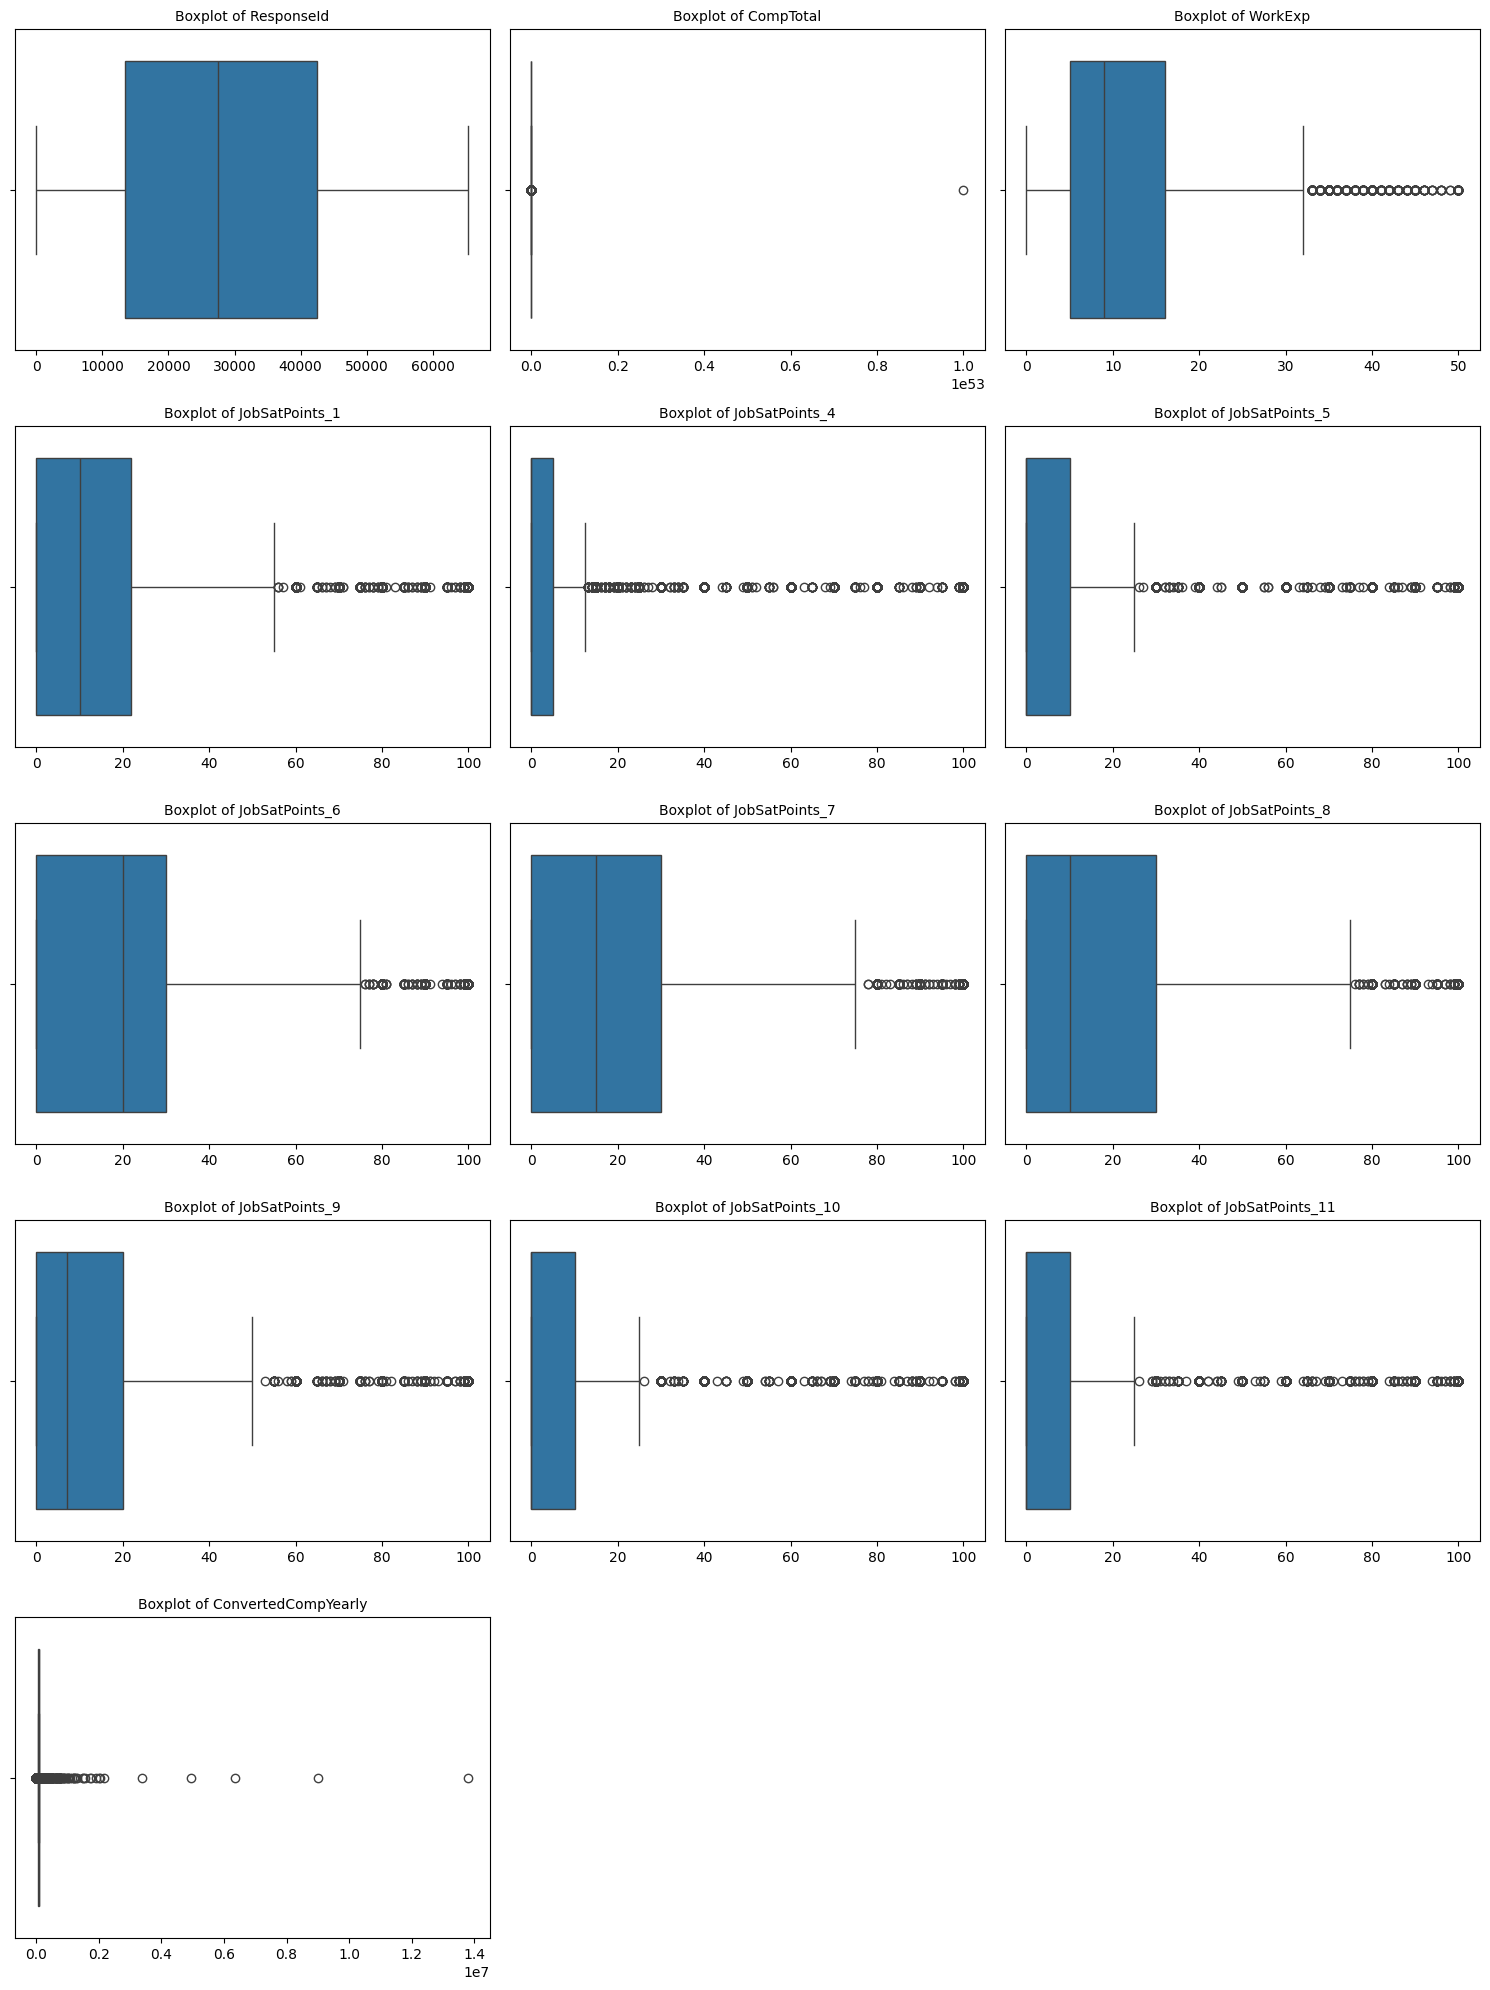

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns for outlier detection
numerical_columns = train_features.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display per row
columns_per_row = 3
# Calculate the number of rows needed
num_rows = math.ceil(len(numerical_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.boxplot(x=train_features[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


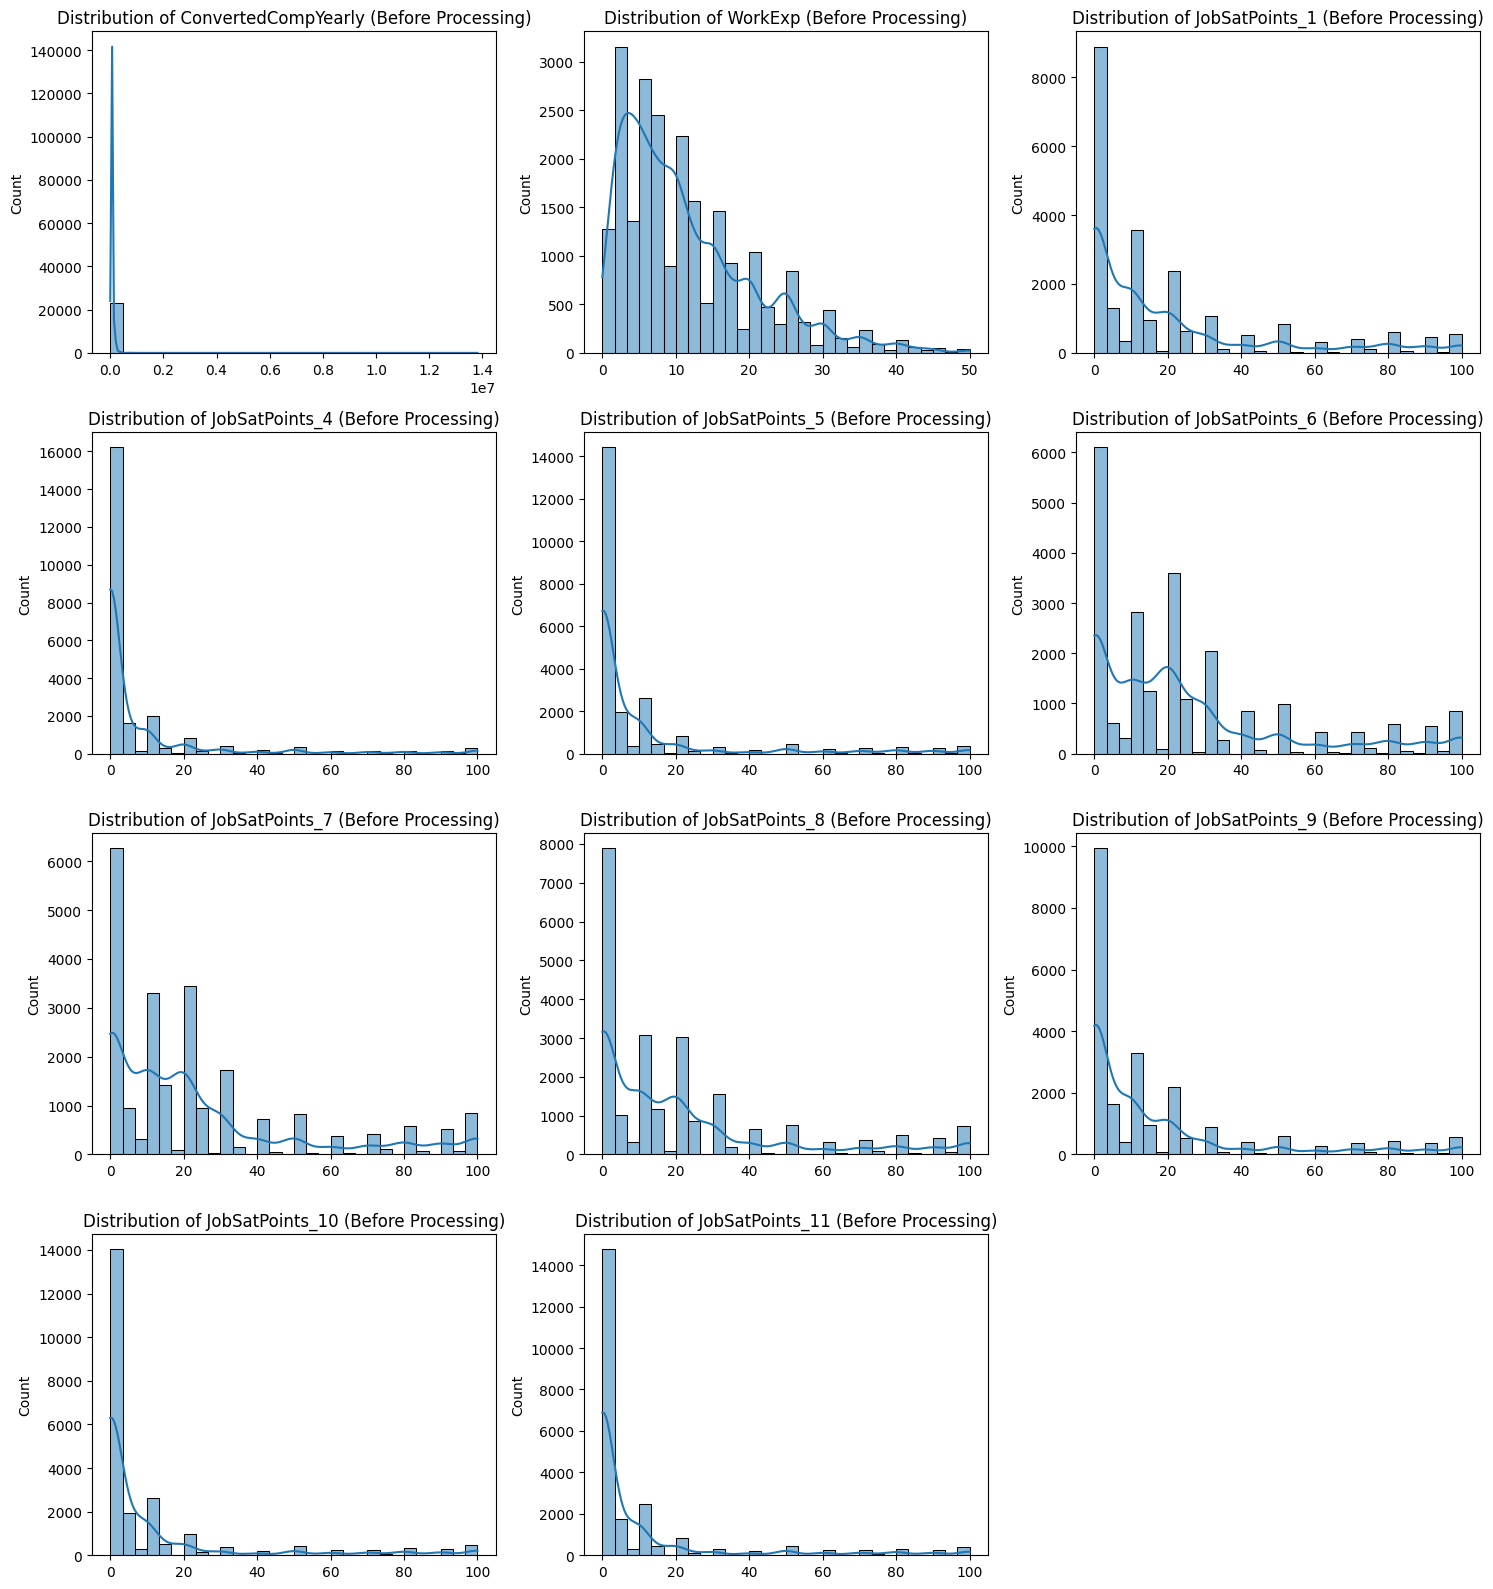

In [482]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define columns with potential outliers
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]

# Visualize the distributions of the features before any transformations or outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Before Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


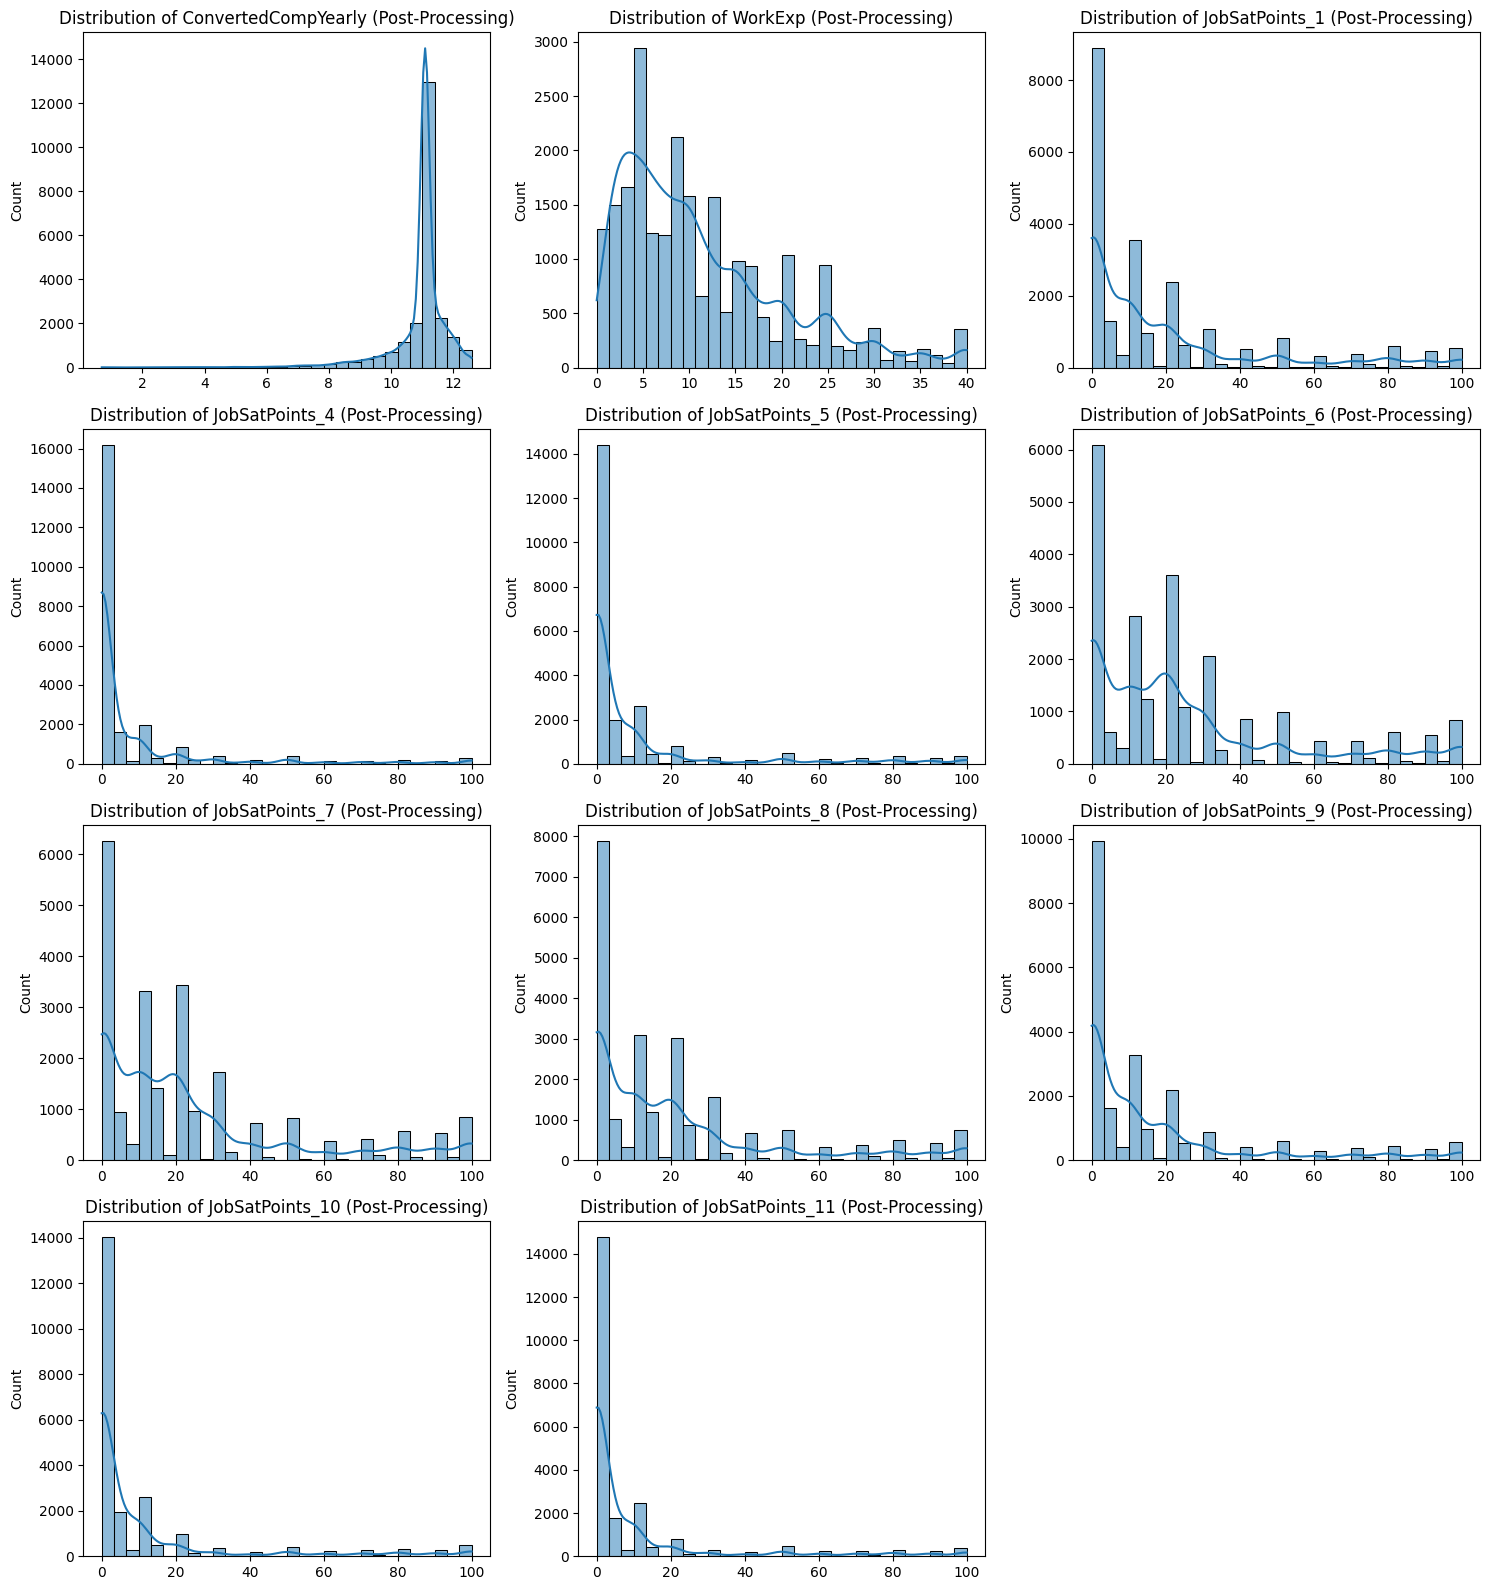

In [483]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Handle NaN values first (if any) in the relevant columns before transformation
train_features['ConvertedCompYearly'] = train_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN
test_features['ConvertedCompYearly'] = test_features['ConvertedCompYearly'].fillna(0)  # Example for handling NaN

# Check for negative values in 'ConvertedCompYearly' before applying log transformation
if (train_features['ConvertedCompYearly'] < 0).any() or (test_features['ConvertedCompYearly'] < 0).any():
    raise ValueError("Negative values found in 'ConvertedCompYearly', which cannot be log-transformed directly.")

# Apply log transformation to 'ConvertedCompYearly' to reduce skewness
train_features['ConvertedCompYearly'] = np.log1p(train_features['ConvertedCompYearly'])
test_features['ConvertedCompYearly'] = np.log1p(test_features['ConvertedCompYearly'])

# Define columns with potential outliers and set the 99th percentile cap using training data
outlier_columns = ['ConvertedCompYearly', 'WorkExp'] + [col for col in train_features.columns if 'JobSatPoints_' in col]
cap_values = {col: train_features[col].quantile(0.99) for col in outlier_columns}

# Apply the cap values to both training and test sets for consistency
for col in outlier_columns:
    cap_value = cap_values[col]
    train_features[col] = np.where(train_features[col] > cap_value, cap_value, train_features[col])
    test_features[col] = np.where(test_features[col] > cap_value, cap_value, test_features[col])

# Visualize the adjusted distributions to confirm outlier handling
columns_per_row = 3
num_rows = math.ceil(len(outlier_columns) / columns_per_row)

plt.figure(figsize=(5 * columns_per_row, 4 * num_rows))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.histplot(train_features[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col} (Post-Processing)')
    plt.xlabel('')  # Hide x-axis label for cleaner look

plt.tight_layout()
plt.show()


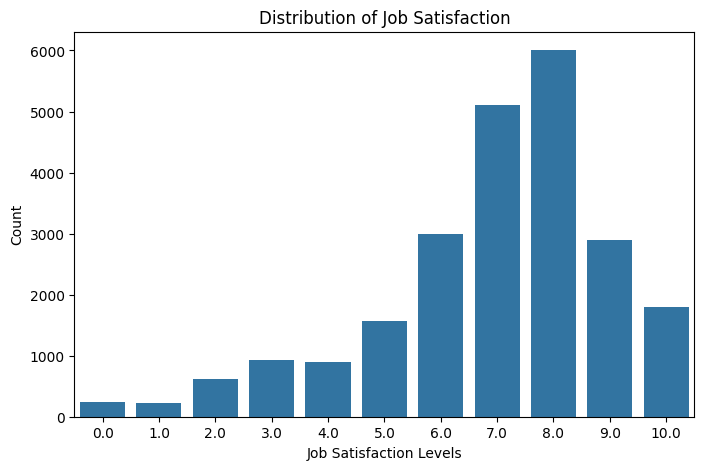

In [484]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable `JobSat` to understand class balance
plt.figure(figsize=(8, 5))
sns.countplot(x=train_data['JobSat'])
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Count")
plt.show()


In [485]:
train_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
16835,16836,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,...,80.0,50.0,20.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,66000.0,5.0
40638,40639,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,...,9.0,9.0,9.0,9.0,9.0,9.0,Appropriate in length,Easy,66000.0,7.0
39715,39716,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,...,40.0,50.0,10.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,110000.0,7.0
39649,39650,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,50.0,0.0,50.0,0.0,0.0,0.0,Appropriate in length,Easy,73312.0,9.0
44832,44833,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,15.0,20.0,20.0,0.0,0.0,Appropriate in length,Easy,66000.0,8.0


In [486]:
# Check for missing values across all columns in the training and test datasets after processing
missing_values_train = train_features.isnull().sum()
missing_values_test = test_features.isnull().sum()

# Display columns with missing values in the training and test datasets
missing_values_train = missing_values_train[missing_values_train > 0]
missing_values_test = missing_values_test[missing_values_test > 0]

missing_values_train, missing_values_test


(Series([], dtype: int64), Series([], dtype: int64))

In [487]:
import pandas as pd

# Assuming train_data and test_data are already defined as per the user's code

# Combine train and test data into a single DataFrame with an indicator for train/test split
train_data['Dataset'] = 'train'
test_data['Dataset'] = 'test'

# Concatenate both dataframes
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Save to a single CSV file
combined_data.to_csv("combined_train_test.csv", index=False)



In [488]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns from both train and test sets
columns_to_drop = ['ResponseId', 'CompTotal']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Identify numerical columns for normalization, excluding the target column
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns.drop('JobSat')

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

# Verify normalization results by checking the first few rows of the transformed data
print(train_data[numerical_columns].head())
print(test_data[numerical_columns].head())


        WorkExp  JobSatPoints_1  JobSatPoints_4  JobSatPoints_5  \
16835 -0.162030        2.363619        3.346667       -0.463324   
40638 -0.708524       -0.337094       -0.088671       -0.098033   
39715  0.165867       -0.722910       -0.410734       -0.463324   
39649 -0.162030       -0.722910       -0.410734       -0.463324   
44832 -0.380628       -0.337094        0.662809       -0.463324   

       JobSatPoints_6  JobSatPoints_7  JobSatPoints_8  JobSatPoints_9  \
16835        2.042237        0.991104       -0.021210       -0.657132   
40638       -0.578696       -0.527402       -0.441800       -0.296077   
39715        0.565655        0.991104       -0.403565       -0.657132   
39649        0.934800       -0.860732        1.125852       -0.657132   
44832       -0.357209       -0.305181       -0.021210        0.145213   

       JobSatPoints_10  JobSatPoints_11  ConvertedCompYearly  
16835        -0.480858        -0.459510            -0.081190  
40638        -0.087861        -0

In [489]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [490]:
import keras
print("Keras version:", keras.__version__)


Keras version: 3.6.0


In [491]:
train_data.JobSat

16835    5.0
40638    7.0
39715    7.0
39649    9.0
44832    8.0
        ... 
44573    8.0
13426    8.0
28068    8.0
18492    7.0
23875    2.0
Name: JobSat, Length: 23300, dtype: float64

In [492]:
print("Available columns in train_data:", train_data.columns.tolist())


Available columns in train_data: ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWork

In [493]:
train_data.shape

(23300, 113)

In [494]:
train_data.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)

In [495]:
train_data.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Dataset
16835,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,...,0.991104,-0.021210,-0.657132,-0.480858,-0.459510,Appropriate in length,Neither easy nor difficult,-0.081190,5.0,train
40638,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,-0.527402,-0.441800,-0.296077,-0.087861,-0.047057,Appropriate in length,Easy,-0.081190,7.0,train
39715,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,API document(s) and/or SDK document(s);User gu...,...,0.991104,-0.403565,-0.657132,-0.480858,-0.459510,Appropriate in length,Neither easy nor difficult,0.234404,7.0,train
39649,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,-0.860732,1.125852,-0.657132,-0.480858,-0.459510,Appropriate in length,Easy,-0.028744,9.0,train
44832,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,-0.305181,-0.021210,0.145213,-0.480858,-0.459510,Appropriate in length,Easy,-0.081190,8.0,train


In [496]:
# List of categorical columns in the train_data
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Initialize lists to store multilabel and non-multilabel categorical columns
multilabel_columns = []
non_multilabel_columns = []

# Iterate over the categorical columns to check for semicolons
for col in categorical_columns:
    # Check if any value in the column contains a semicolon
    if train_data[col].str.contains(';').any():
        multilabel_columns.append(col)  # Add to multilabel columns
    else:
        non_multilabel_columns.append(col)  # Add to non-multilabel columns

# Print the results
print("Multilabel Columns:", multilabel_columns)
print("Non-multilabel Columns:", non_multilabel_columns)


Multilabel Columns: ['Employment', 'CodingActivities', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'BuyNewTool', 'TechEndorse', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWork

In [497]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    # Combine both train and test data to ensure all possible labels are considered
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)  # Fit on combined data
    
    # Apply the encoding on both train and test data
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    
    return train_data, test_data, le


# Apply encoding on non-multilabel columns (for Label Encoding)
for col in non_multilabel_columns:
    train_data, test_data, le = encode_column(train_data, test_data, col)

# You can add code here to process multilabel columns using Embedding layers (as per your previous approach).

# Check that encoding was applied correctly
print(train_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [498]:
# Assuming 'JobSat' is the target variable
y_train = train_data['JobSat']  
y_test = test_data['JobSat']

# Define X_train and X_test by including both multilabel and non-multilabel columns
X_train_multilabel = [train_data[col] for col in multilabel_columns if col in train_data.columns]
X_train_non_multilabel = [train_data[col] for col in non_multilabel_columns if col in train_data.columns]

# Convert X_train to a DataFrame
X_train = pd.concat(X_train_multilabel + X_train_non_multilabel, axis=1)

X_test_multilabel = [test_data[col] for col in multilabel_columns if col in test_data.columns]
X_test_non_multilabel = [test_data[col] for col in non_multilabel_columns if col in test_data.columns]

# Convert X_test to a DataFrame
X_test = pd.concat(X_test_multilabel + X_test_non_multilabel, axis=1)

# Check the shape of X_train, X_test, y_train, and y_test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (23300, 101)
X_test shape: (5826, 101)
y_train shape: (23300,)
y_test shape: (5826,)


In [499]:
X_train.head()

,Employment,CodingActivities,LearnCode,LearnCodeOnline,TechDoc,BuyNewTool,TechEndorse,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,...,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase,Dataset
16835,"Employed, full-time;Independent contractor, fr...",Hobby;Contribute to open-source projects,"Colleague;Other online resources (e.g., videos...",Technical documentation;Stack Overflow;Coding ...,API document(s) and/or SDK document(s);User gu...,Start a free trial;Ask developers I know/work ...,APIs;Reputation for quality and excellence;Con...,Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,Bash/Shell (all shells);C#;C++;JavaScript;PHP;...,Bash/Shell (all shells);C++;JavaScript;PHP;Typ...,...,0,0,2,0,0,8,13,0,2,1
40638,"Employed, full-time",Professional development or self-paced learnin...,Online Courses or Certification;Coding Bootcamp,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,Ask a generative AI tool,AI tool integration,C;C++;Python,C++;Python,C++;Python,...,2,2,0,3,2,1,13,0,1,1
39715,"Employed, full-time",Hobby;Professional development or self-paced l...,On the job training;Other online resources (e....,Stack Overflow;Coding sessions (live or record...,API document(s) and/or SDK document(s);User gu...,Ask developers I know/work with,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);Python;SQL,Bash/Shell (all shells);C++;Python;Rust;SQL;Ty...,Bash/Shell (all shells);Python;SQL,...,0,2,1,0,0,8,13,0,2,1
39649,"Employed, full-time",Hobby,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,Start a free trial;Ask developers I know/work ...,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);Python,Bash/Shell (all shells);Elixir;Python;Rust,Bash/Shell (all shells);Python,...,0,4,1,0,0,6,10,0,1,1
44832,"Employed, full-time",Hobby;Contribute to open-source projects,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,Start a free trial,APIs;Customization;Reputation for quality and ...,Bash/Shell (all shells);C;C++;Go;Python,C++;Go,C++;Go,...,3,4,3,0,1,4,14,0,1,1


In [500]:
# Correct use of iloc to access by index position
train_data.iloc[0]  # First row

# Correct use of loc to access by column name
train_data.loc[:, 'JobSat']  # Accessing column by name


16835    5.0
40638    7.0
39715    7.0
39649    9.0
44832    8.0
        ... 
44573    8.0
13426    8.0
28068    8.0
18492    7.0
23875    2.0
Name: JobSat, Length: 23300, dtype: float64

In [501]:
print(len(train_data.columns))  # To see all the column names in the training data
print(len(test_data.columns))   # To see all the column names in the test data


113
113


In [502]:
print(train_data.columns)
print(test_data.columns)


Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)
Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Dataset'],
      dtype='object', length=113)


In [503]:
print(train_data.head())
print(test_data.head())


       MainBranch  Age                                         Employment  \
16835           0    1  Employed, full-time;Independent contractor, fr...   
40638           0    1                                Employed, full-time   
39715           0    1                                Employed, full-time   
39649           0    1                                Employed, full-time   
44832           0    1                                Employed, full-time   

       RemoteWork  Check                                   CodingActivities  \
16835           1      0           Hobby;Contribute to open-source projects   
40638           1      0  Professional development or self-paced learnin...   
39715           2      0  Hobby;Professional development or self-paced l...   
39649           2      0                                              Hobby   
44832           0      0           Hobby;Contribute to open-source projects   

       EdLevel                                          LearnC

In [504]:
print(train_data.columns.tolist())
print(test_data.columns.tolist())


['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal_use', 'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired',

In [505]:
print(X_train.dtypes)
print(y_train.dtypes)


Employment              object
CodingActivities        object
LearnCode               object
LearnCodeOnline         object
TechDoc                 object
                         ...  
ProfessionalQuestion     int64
Industry                 int64
SurveyLength             int64
SurveyEase               int64
Dataset                  int64
Length: 101, dtype: object
float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    return train_data, test_data

# Apply encoding to non-numeric columns (example: categorical columns)
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Identify non-numeric columns
        X_train, X_test = encode_column(X_train, X_test, col)

# Function to preprocess multi-label columns (split semicolon-separated values)
def preprocess_multilabel_column(column):
    return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# Identify the multi-label columns and preprocess them
multilabel_columns = [col for col in X_train.columns if X_train[col].dtype == 'object' and ';' in X_train[col].iloc[0]]

for col in multilabel_columns:
    X_train[col] = preprocess_multilabel_column(X_train[col])
    X_test[col] = preprocess_multilabel_column(X_test[col])

# Map JobSat to binary categories for the binary classification task
def map_to_binary_class(value):
    if value <= 5:
        return 0  # Not Satisfied (0-5)
    else:
        return 1  # Satisfied (6-10)

# Apply mapping to create a binary classification target
y_train_binary = y_train.apply(map_to_binary_class)
y_test_binary = y_test.apply(map_to_binary_class)

# Check the unique values and distribution of the binary target
print("Unique values in y_train_binary:", np.unique(y_train_binary))
print("Class distribution in y_train_binary:", np.bincount(y_train_binary))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# Ensure all data is in float32 type for TensorFlow compatibility
X_train = np.array(X_train, dtype=np.float32)
X_val = np.array(X_val, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_val = np.array(y_val, dtype=np.int32)

# Create the embedding layers for multi-label columns
embedding_layers = []

for col in multilabel_columns:
    # Get the number of unique values for the column and add an embedding layer for each multi-label column
    unique_values = len(np.unique(np.concatenate(X_train[col].values)))
    embedding_size = 16
    embedding_layer = Embedding(input_dim=unique_values, output_dim=embedding_size, input_length=1)
    embedding_layers.append(embedding_layer)

# Define the binary classification model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Apply the embedding layers for multi-label columns
embedding_outputs = [embedding_layer(X_train[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]

# Concatenate all layers together
x = Concatenate()(embedding_outputs + [x])

# Add the final output layer
output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)



Unique values in y_train_binary: [0 1]
Class distribution in y_train_binary: [ 4488 18812]


In [568]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(np.bincount(y_train_balanced))

# Verify shape
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")


Class distribution after SMOTE:
[15060 15060]
X_train_balanced shape: (30120, 101)
y_train_balanced shape: (30120,)


In [508]:
X_train_balanced = np.array(X_train_balanced, dtype=np.float32)
y_train_balanced = np.array(y_train_balanced, dtype=np.int32)


In [509]:
print(X_train_balanced.shape, X_val.shape)
print(y_train_balanced.shape, y_val.shape)


(30120, 101) (4660, 101)
(30120,) (4660,)


In [510]:
print(np.unique(y_train_balanced), np.unique(y_val))


[0 1] [0 1]


In [511]:
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization, Concatenate
# from tensorflow.keras.models import Model

# # Input layer
# input_layer = Input(shape=(X_train_balanced.shape[1],))

# # First dense block
# x = Dense(128)(input_layer)
# x = BatchNormalization()(x)  # Normalize activations
# x = LeakyReLU()(x)           # Non-linearity
# x = Dropout(0.5)(x)          # Regularization

# # Second dense block
# x = Dense(64)(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = Dropout(0.4)(x)

# # Third dense block
# x = Dense(32)(x)
# x = BatchNormalization()(x)
# x = LeakyReLU()(x)
# x = Dropout(0.3)(x)

# # Output layer (binary classification)
# output_layer = Dense(1, activation='sigmoid')(x)

# # Define the model
# model = Model(inputs=input_layer, outputs=output_layer)


In [512]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6
)

# # Train the model
# history = model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=200,
#     batch_size=32,
#     callbacks=[early_stopping, lr_reduction]
# )


In [513]:
# from sklearn.metrics import classification_report, accuracy_score

# # Predict on the validation set
# y_val_pred = model.predict(X_val).round()

# # Calculate accuracy and classification report
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy}")
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


In [514]:
# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [515]:
# # Plot loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [516]:
# # Adjust focal loss parameters
# def focal_loss(alpha=0.5, gamma=2.0):
#     def loss(y_true, y_pred):
#         bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
#         p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
#         return bce * (alpha * tf.pow(1 - p_t, gamma))
#     return loss



In [517]:
from tensorflow.keras.models import Sequential


In [518]:
# def build_model(hp):
#     model = Sequential()
    
#     # Input layer
#     model.add(Dense(
#         units=hp.Int('units_input', min_value=64, max_value=256, step=64), 
#         input_dim=X_train_balanced.shape[1]
#     ))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU())
#     model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))
    
#     # Hidden layers
#     for i in range(hp.Int('num_hidden_layers', 1, 3)):
#         model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)))
#         model.add(BatchNormalization())
#         model.add(LeakyReLU())
#         model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))
    
#     # Output layer
#     model.add(Dense(1, activation='sigmoid'))
    
#     # Compile the model with tunable alpha and gamma
#     model.compile(
#         optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
#         loss=focal_loss(
#             alpha=hp.Float('alpha', min_value=0.1, max_value=0.5, step=0.1),  # Tune alpha
#             gamma=hp.Int('gamma', min_value=1, max_value=4, step=1)  # Tune gamma
#         ),
#         metrics=['accuracy']
#     )
    
#     return model


In [519]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from keras_tuner import Hyperband

# def get_callbacks():
#     return [
#         EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#         ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)
#     ]


In [520]:
# tuner = Hyperband(
#     build_model,
#     objective='val_accuracy',  # Optimize validation accuracy
#     max_epochs=50,
#     factor=3,
#     directory='focal_loss_tuning',
#     project_name='alpha_gamma_tuning'
# )

# # Perform the search
# tuner.search(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=get_callbacks()  # Use the function to reinitialize callbacks
# )


In [521]:
# # Retrieve the best hyperparameters after tuning
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  # Get the best set of hyperparameters
# print(f"Best hyperparameters: {best_hps.values}")

In [522]:
# # Adjust class weights
# class_weights = {0: 2.0, 1: 1.0}  # Increase weight for the minority class


In [523]:
# # Build the model with the best hyperparameters
# best_model = tuner.hypermodel.build(best_hps)

# # Train the model with callbacks
# history = best_model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     class_weight=class_weights,
#     callbacks=[early_stopping, lr_reduction]
# )


In [524]:
# # Evaluate the best model on the test set
# test_loss, test_accuracy = best_model.evaluate(X_test, y_test_binary)
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")


In [525]:
# import matplotlib.pyplot as plt

# # Plot training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [526]:
# # Plot training and validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [527]:
# from sklearn.metrics import classification_report

# # Predict on the test set
# y_test_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# # Classification report
# print(classification_report(y_test_binary, y_test_pred, target_names=['Not Satisfied', 'Satisfied']))


In [528]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Confusion matrix
# cm = confusion_matrix(y_test_binary, y_test_pred)
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


In [529]:
# # Build the model with the best parameters
# best_model = tuner.hypermodel.build(best_hps)

# # Train the model
# history = best_model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[early_stopping, lr_reduction]
# )


In [530]:
# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"Optimal alpha: {best_hps.get('alpha')}")
# print(f"Optimal gamma: {best_hps.get('gamma')}")


In [531]:
import tensorflow as tf

def focal_loss(alpha=0.25, gamma=2.0):
    """
    Focal Loss for binary classification.
    Args:
        alpha (float): Balancing factor, default is 0.25.
        gamma (float): Focusing parameter to reduce the impact of easy examples, default is 2.0.
    Returns:
        loss: A callable function that computes focal loss.
    """
    def loss(y_true, y_pred):
        # Compute binary cross-entropy
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        
        # Compute p_t
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        
        # Apply the focal loss formula
        return bce * (alpha * tf.pow(1 - p_t, gamma))
    return loss


In [532]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization


In [561]:
from tensorflow.keras.layers import Embedding, Flatten, Input, Concatenate

def build_model_with_embedding(hp, num_categorical_features, num_unique_values_per_feature):
    inputs = []
    embeddings = []

    # Embedding layers for categorical features
    for feature_index in range(num_categorical_features):
        input_layer = Input(shape=(1,), name=f'input_{feature_index}')
        embedding_layer = Embedding(
            input_dim=num_unique_values_per_feature[feature_index],  # Number of unique values in the feature
            output_dim=16,  # Best embedding size
            name=f'embedding_{feature_index}'
        )(input_layer)
        flattened_layer = Flatten()(embedding_layer)
        inputs.append(input_layer)
        embeddings.append(flattened_layer)

    # Combine all embeddings
    combined_embeddings = Concatenate()(embeddings)

    # Add dense layers to the combined embeddings
    x = Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=64)
    )(combined_embeddings)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Add hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        x = Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Output layer
    output = Dense(1, activation='sigmoid')(x)

    # Define the model
    model = Model(inputs=inputs, outputs=output)

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss=focal_loss(alpha=0.4, gamma=2),  # Use the focal loss function here
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = Hyperband(
    lambda hp: build_model_with_embedding(hp, num_categorical_features, num_unique_values_per_feature),
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperparam_tuning',
    project_name='focal_loss_with_embeddings'
)


In [533]:
# Update the model compilation to use focal loss
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=256, step=64), 
        input_dim=X_train_balanced.shape[1]
    ))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)))
        model.add(BatchNormalization())
        model.add(LeakyReLU())
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
        loss=focal_loss(alpha=0.4, gamma=2),  # Use the focal loss function here
        metrics=['accuracy']
    )
    
    return model


In [559]:
from keras_tuner import Hyperband

# Initialize the tuner
tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs=50,
    factor=3,
    directory='hyperparam_tuning',
    project_name='focal_loss_tuning'
)

# Perform the search
tuner.search(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping,lr_reduction]
)


Reloading Tuner from hyperparam_tuning\focal_loss_tuning\tuner0.json


In [560]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_binary)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/50


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


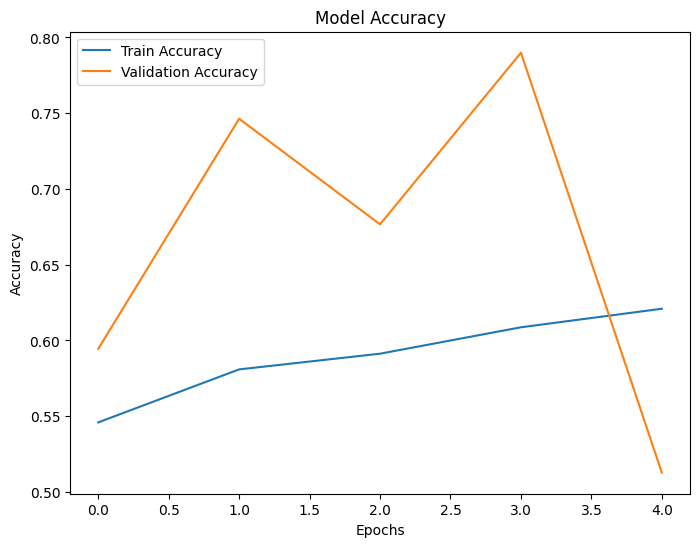

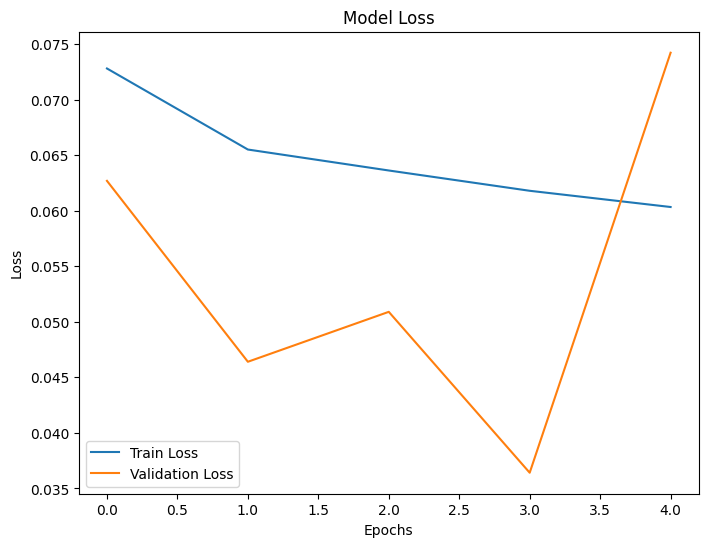

Classification Report:
                precision    recall  f1-score   support

Not Satisfied       0.21      0.41      0.28      1122
    Satisfied       0.82      0.63      0.71      4704

     accuracy                           0.59      5826
    macro avg       0.51      0.52      0.49      5826
 weighted avg       0.70      0.59      0.63      5826



In [554]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Assuming `best_model`, `X_test`, `y_test_binary`, and `history` are defined

# Evaluate the model on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Classification report
class_report = classification_report(y_test_binary, y_test_pred_binary, target_names=["Not Satisfied", "Satisfied"])

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


### **Analysis of Results**

#### **1. Model Performance**
- **Test Accuracy:** 76.33% is reasonable, but it’s not sufficient for a well-balanced dataset, indicating that the model struggles with the minority class.
- **Classification Report:**
  - **Not Satisfied:**
    - Precision: 0.24 (low, meaning many false positives for this class).
    - Recall: 0.11 (very low, meaning the model misses most "Not Satisfied" instances).
    - F1-score: 0.15 (poor balance between precision and recall).
  - **Satisfied:**
    - Precision: 0.81 (good, meaning the model makes relatively few false positives for this class).
    - Recall: 0.92 (very good, meaning the model identifies most "Satisfied" instances).
    - F1-score: 0.86 (strong for this class).
  - The weighted average metrics are biased toward the majority class ("Satisfied").

#### **2. Key Observations**
- **Class Imbalance:** Despite using SMOTE for balancing the dataset, the model still heavily favors the majority class ("Satisfied") over the minority class ("Not Satisfied"). This is evident from the low recall and F1-score for the "Not Satisfied" class.
- **Overfitting Trends:**
  - Validation accuracy fluctuates significantly during training, indicating overfitting or instability in training.
  - Validation loss increases in later epochs (epoch 4), suggesting the model is starting to overfit the training data.

#### **3. Possible Issues**
- **Loss Function:** While focal loss improves handling of class imbalance, its parameters (e.g., `alpha` and `gamma`) might not be optimal for this dataset.
- **Learning Rate:** A fixed learning rate of 0.001 might not be suitable. Validation accuracy and loss suggest the model could benefit from a dynamically adjusted learning rate.
- **Model Capacity:**
  - Too few or too many units in the hidden layers can lead to underfitting or overfitting.
  - The current architecture might not be capturing the nuances of the minority class ("Not Satisfied").

#### **4. Recommendations for Improvement**
1. **Hyperparameter Optimization for Focal Loss:**
   - Fine-tune `alpha` and `gamma` further using methods like grid search or Bayesian optimization to address the imbalance more effectively.

2. **Weighted Sampling:**
   - Instead of only using SMOTE, try assigning higher weights to the "Not Satisfied" class in the `class_weight` argument during training.

3. **Dynamic Learning Rate:**
   - Use learning rate schedulers like ReduceLROnPlateau to dynamically adjust the learning rate during training.

4. **Model Architecture:**
   - Experiment with a deeper or more complex architecture with additional regularization (e.g., L2 regularization or higher dropout rates).

5. **Alternative Metrics:**
   - Focus on recall or F1-score for the "Not Satisfied" class, as it is the harder-to-predict minority class.

6. **Ensemble Methods:**
   - Combine predictions from multiple models (e.g., using bagging or boosting) to improve generalization.

#### **Next Steps**
- Implement some of the suggested improvements.
- Plot precision, recall, and F1-score across epochs to monitor how well the model balances both classes during training.
- Test with a combination of class weights and focal loss to further boost minority class performance.



In [555]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Get predictions for the test set
y_test_pred_proba = best_model.predict(X_test).ravel()  # Probabilities
y_test_pred = (y_test_pred_proba > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test_binary, y_test_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

# Macro F1-Score
macro_f1 = f1_score(y_test_binary, y_test_pred, average='macro')
print(f"Macro F1-Score: {macro_f1:.4f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test_binary, y_test_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

# Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test_binary, y_test_pred, target_names=['Not Satisfied', 'Satisfied']))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


128/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

KeyboardInterrupt: 

In [ ]:
# class_weights = {0: 2.0, 1: 1.0}  # Increase weight for "Not Satisfied"
# history = best_model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[early_stopping, lr_reduction],
#     class_weight=class_weights
# )


Epoch 1/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6494 - loss: 0.0478 - val_accuracy: 0.3687 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 2/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6626 - loss: 0.0464 - val_accuracy: 0.4942 - val_loss: 0.0529 - learning_rate: 0.0010
Epoch 3/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6635 - loss: 0.0462 - val_accuracy: 0.7622 - val_loss: 0.0246 - learning_rate: 0.0010
Epoch 4/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6779 - loss: 0.0442 - val_accuracy: 0.7468 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 5/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6799 - loss: 0.0437 - val_accuracy: 0.7498 - val_loss: 0.0255 - learning_rate: 0.0010


In [ ]:
# Define class weights
class_weights = {0: 2.0, 1: 0.5}

# Compile the model with focal loss
best_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# Train the model with class weights
history = best_model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, lr_reduction]
)


Epoch 1/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6083 - loss: 0.0378 - val_accuracy: 0.7064 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 2/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6465 - loss: 0.0329 - val_accuracy: 0.3597 - val_loss: 0.0912 - learning_rate: 0.0010
Epoch 3/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6478 - loss: 0.0331 - val_accuracy: 0.5695 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 4/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6571 - loss: 0.0321 - val_accuracy: 0.3790 - val_loss: 0.0935 - learning_rate: 0.0010
Epoch 5/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6623 - loss: 0.0310 - val_accuracy: 0.3479 - val_loss: 0.1198 - learning_rate: 5.0000e-04


In [ ]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
y_test_probs = best_model.predict(X_test)

# Find the best threshold
best_threshold = 0
best_macro_f1 = 0
for threshold in np.arange(0.3, 0.5, 0.01):
    y_test_pred = (y_test_probs >= threshold).astype(int)
    macro_f1 = f1_score(y_test_binary, y_test_pred, average='macro')
    print(f"Threshold: {threshold}, Macro F1-Score: {macro_f1:.4f}")
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        best_threshold = threshold

print(f"Optimal Threshold: {best_threshold}, Best Macro F1-Score: {best_macro_f1:.4f}")


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Threshold: 0.3, Macro F1-Score: 0.4838
Threshold: 0.31, Macro F1-Score: 0.4844
Threshold: 0.32, Macro F1-Score: 0.4851
Threshold: 0.33, Macro F1-Score: 0.4888
Threshold: 0.34, Macro F1-Score: 0.4944
Threshold: 0.35000000000000003, Macro F1-Score: 0.4991
Threshold: 0.36000000000000004, Macro F1-Score: 0.5033
Threshold: 0.37000000000000005, Macro F1-Score: 0.5070
Threshold: 0.38000000000000006, Macro F1-Score: 0.5118
Threshold: 0.39000000000000007, Macro F1-Score: 0.5150
Threshold: 0.4000000000000001, Macro F1-Score: 0.5161
Threshold: 0.4100000000000001, Macro F1-Score: 0.5185
Threshold: 0.4200000000000001, Macro F1-Score: 0.5209
Threshold: 0.4300000000000001, Macro F1-Score: 0.5247
Threshold: 0.4400000000000001, Macro F1-Score: 0.5282
Threshold: 0.4500000000000001, Macro F1-Score: 0.5308
Threshold: 0.46000000000000013, Macro F1-Score: 0.5344
Threshold: 0.47000000000000014, Macro F1-Score: 0.5355
Threshold: 0.48000000000000015, Macro F1-Score: 0.5

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.23      0.24      1122
           1       0.82      0.84      0.83      4704

    accuracy                           0.72      5826
   macro avg       0.54      0.53      0.54      5826
weighted avg       0.71      0.72      0.72      5826

Macro F1-Score at Threshold 0.47: 0.5355


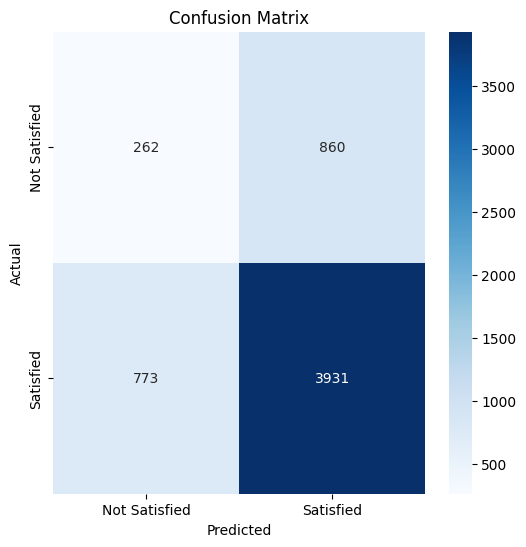

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict probabilities
y_test_probs = best_model.predict(X_test)

# Apply the optimal threshold
optimal_threshold = 0.47
y_test_pred = (y_test_probs >= optimal_threshold).astype(int)

# Classification report
print("Classification Report:")
print(classification_report(y_test_binary, y_test_pred, zero_division=0))

# Macro F1-Score
from sklearn.metrics import f1_score
macro_f1 = f1_score(y_test_binary, y_test_pred, average='macro')
print(f"Macro F1-Score at Threshold {optimal_threshold}: {macro_f1:.4f}")

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_binary, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Satisfied", "Satisfied"], yticklabels=["Not Satisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# from keras_tuner import Hyperband
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
# from tensorflow.keras.optimizers import Adam

# # Define the model for tuning
# def build_model(hp):
#     model = Sequential()
    
#     # Input layer
#     model.add(Dense(
#         units=hp.Int('units_input', min_value=64, max_value=256, step=64), 
#         input_dim=X_train_balanced.shape[1]
#     ))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU())
#     model.add(Dropout(hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))
    
#     # Hidden layers
#     for i in range(hp.Int('num_hidden_layers', 1, 3)):
#         model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)))
#         model.add(BatchNormalization())
#         model.add(LeakyReLU())
#         model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))
    
#     # Output layer
#     model.add(Dense(1, activation='sigmoid'))
    
#     # Compile the model
#     model.compile(
#         optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])),
#         loss='binary_crossentropy',
#         metrics=['accuracy']
#     )
    
#     return model


In [ ]:
# import keras_tuner as kt

# # Define the tuner
# tuner = Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=20,
#     factor=3,
#     directory='hyperparam_tuning',
#     project_name='job_satisfaction'
# )


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# # Perform hyperparameter tuning
# tuner.search(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping]
# )


Trial 30 Complete [00h 00m 18s]
val_accuracy: 0.5066523551940918

Best val_accuracy So Far: 0.8021458983421326
Total elapsed time: 00h 09m 46s


In [ ]:
# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal number of units in the input layer is {best_hps.get('units_input')},
# with a dropout rate of {best_hps.get('dropout_input')}.
# The model has {best_hps.get('num_hidden_layers')} hidden layers, 
# and the best learning rate is {best_hps.get('learning_rate')}.
# """)



The optimal number of units in the input layer is 192,
with a dropout rate of 0.4.
The model has 1 hidden layers, 
and the best learning rate is 0.001.



In [ ]:
# # Build the best model
# best_model = tuner.hypermodel.build(best_hps)

# # Train the best model
# history = best_model.fit(
#     X_train_balanced, y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[early_stopping, lr_reduction]
# )


Epoch 1/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5251 - loss: 0.7308 - val_accuracy: 0.4732 - val_loss: 0.7089 - learning_rate: 0.0010
Epoch 2/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5626 - loss: 0.6827 - val_accuracy: 0.6129 - val_loss: 0.6507 - learning_rate: 0.0010
Epoch 3/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5650 - loss: 0.6783 - val_accuracy: 0.7202 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 4/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5884 - loss: 0.6705 - val_accuracy: 0.5695 - val_loss: 0.6700 - learning_rate: 0.0010
Epoch 5/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5948 - loss: 0.6662 - val_accuracy: 0.6077 - val_loss: 0.6460 - learning_rate: 0.0010
Epoch 6/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6098 - loss: 0.6582 - val_accuracy: 0.6373 - val_loss: 0.6305 - learning_rate: 0.0010
Epoch 7/50
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6049 - loss: 0.6594 - 

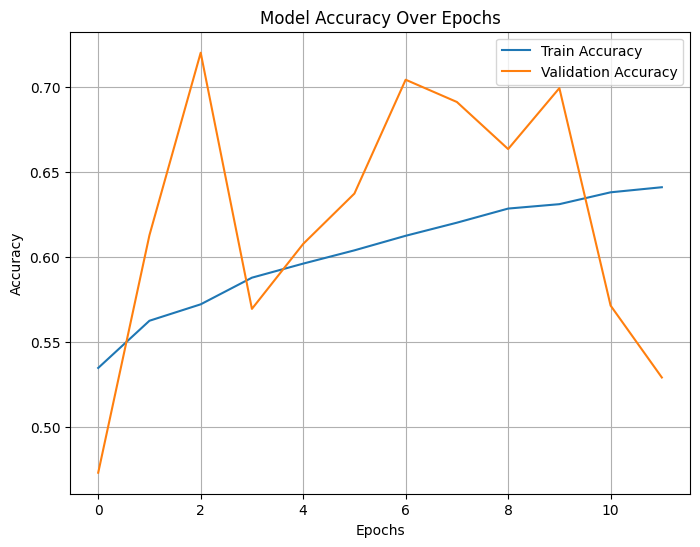

In [ ]:
# import matplotlib.pyplot as plt

# # Plot accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


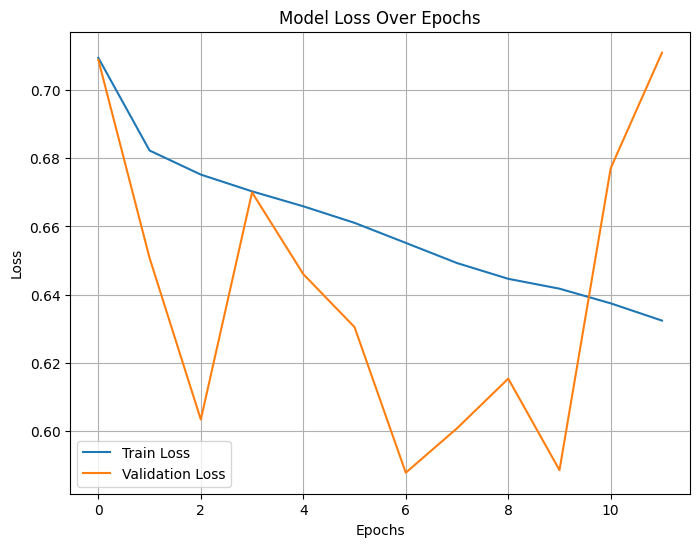

In [ ]:
# # Plot loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


In [ ]:
# # Predict on the test set
# y_test_pred = best_model.predict(X_test).round()  # Round predictions for binary classification


In [ ]:
# import seaborn as sns

# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Early stopping to terminate training when validation loss stops improving
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Monitor validation loss
#     patience=5,          # Number of epochs with no improvement after which training stops
#     restore_best_weights=True  # Restore the best weights when stopping
# )

# # Learning rate reduction on plateau
# lr_reduction = ReduceLROnPlateau(
#     monitor='val_loss',  # Monitor validation loss
#     factor=0.5,          # Reduce learning rate by this factor
#     patience=3,          # Number of epochs with no improvement before reducing learning rate
#     min_lr=1e-6          # Minimum learning rate
# )


In [ ]:
# # Compile the model
# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# # Train the model with callbacks
# history = model.fit(
#     X_train_balanced, 
#     y_train_balanced,
#     validation_data=(X_val, y_val),
#     epochs=200,
#     batch_size=32,
#     callbacks=[early_stopping, lr_reduction]  # Include the callbacks here
# )


Epoch 1/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5110 - loss: 17.6697 - val_accuracy: 0.7670 - val_loss: 0.6392 - learning_rate: 0.0010
Epoch 2/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5038 - loss: 0.8735 - val_accuracy: 0.7989 - val_loss: 0.6239 - learning_rate: 0.0010
Epoch 3/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5018 - loss: 0.8704 - val_accuracy: 0.1964 - val_loss: 0.8172 - learning_rate: 0.0010
Epoch 4/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5043 - loss: 0.8294 - val_accuracy: 0.7961 - val_loss: 0.6535 - learning_rate: 0.0010
Epoch 5/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5041 - loss: 0.8177 - val_accuracy: 0.6811 - val_loss: 0.6787 - learning_rate: 0.0010
Epoch 6/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4973 - loss: 0.7360 - val_accuracy: 0.2041 - val_loss: 0.7578 - learning_rate: 5.0000e-04
Epoch 7/200
942/942 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5061 - los

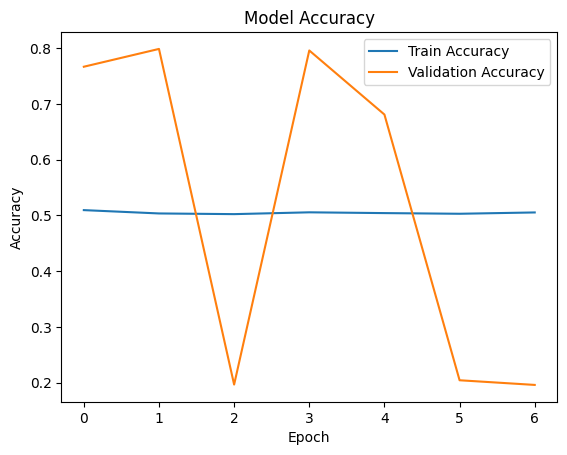

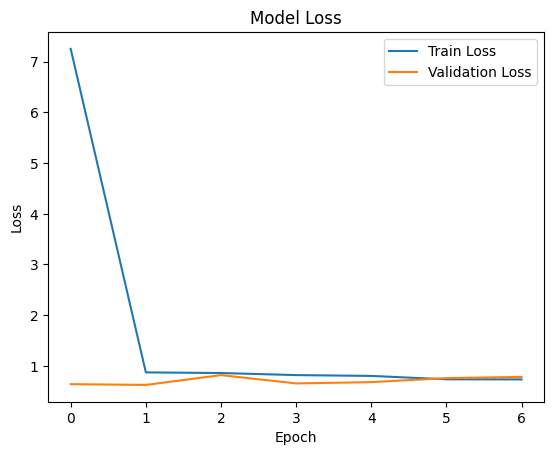

In [ ]:
# import matplotlib.pyplot as plt

# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


In [ ]:
# # Predict on the test set
# y_test_pred = model.predict(X_test).round()

# # Calculate accuracy and display classification report
# test_accuracy = accuracy_score(y_test_binary, y_test_pred)
# print(f"Test Accuracy: {test_accuracy}")
# print("\nTest Classification Report:\n", classification_report(y_test_binary, y_test_pred, zero_division=0))


In [ ]:
# # Re-compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Re-train the model on the balanced dataset
# history = model.fit(X_train_balanced, y_train_balanced,
#                     validation_data=(X_val, y_val),
#                     epochs=200,
#                     batch_size=32,
#                     callbacks=[early_stopping, lr_reduction])


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

# # Set up early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# class_weights = {0: 5.0, 1: 0.5}

# # Train the model with class weights
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val), 
#                     epochs=200, 
#                     batch_size=32, 
#                     callbacks=[early_stopping, lr_reduction], 
#                     class_weight=class_weights)

# # Evaluate the model
# y_val_pred = model.predict(X_val).round()  # Round predictions for binary classification
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy}")
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3581 - loss: 1000.0928 - val_accuracy: 0.5200 - val_loss: 16.0590 - learning_rate: 0.0010
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3797 - loss: 146.5966 - val_accuracy: 0.5345 - val_loss: 3.9459 - learning_rate: 0.0010
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3718 - loss: 71.9768 - val_accuracy: 0.1957 - val_loss: 5.5999 - learning_rate: 0.0010
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3803 - loss: 30.0414 - val_accuracy: 0.1959 - val_loss: 2.6052 - learning_rate: 0.0010
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3773 - loss: 5.1581 - val_accuracy: 0.2178 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 6/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3764 - loss: 1.1662 - val_accuracy: 0.1966 - val_loss: 0.8442 - learning_rate: 0.0010
Epoch 7/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3720 - 

In [ ]:
# from tensorflow.keras.metrics import AUC
# import tensorflow.keras.backend as K
# # Focal Loss for Class Imbalance

# threshold = 0.3  # Adjust threshold for class 0
# y_val_pred = (model.predict(X_val) >= threshold).astype(int)

# def focal_loss(alpha, gamma):
#     def loss(y_true, y_pred):
#         bce = K.binary_crossentropy(y_true, y_pred)
#         p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
#         alpha_factor = y_true * alpha + (1 - y_true) * (1 - alpha)
#         modulating_factor = K.pow((1.0 - p_t), gamma)
#         return alpha_factor * modulating_factor * bce
#     return loss


# threshold = 0.3  # Adjust threshold for class 0
# y_val_pred = (model.predict(X_val) >= threshold).astype(int)


# # Updated class weights
# # class_weights = {0: 5.0, 1: 0.5}

# class_weights = {0: 10.0, 1: 1.0}


# # Compile the model with Focal Loss and AUC
# # alpha = 0.75
# # gamma = 2.0
# alpha = 0.75  # Class weight for minority class
# gamma = 3.0   # Stronger focus on hard examples


# model.compile(optimizer=Adam(learning_rate=0.0005), 
#               loss=focal_loss(alpha, gamma),
#               metrics=['accuracy', AUC()])

# # Add callbacks for learning rate reduction and early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # Train the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#                     epochs=200, batch_size=32,
#                     callbacks=[early_stopping, lr_reduction],
#                     class_weight=class_weights)

# # Evaluate the model
# y_val_pred = model.predict(X_val).round()
# print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5068 - auc: 0.5035 - loss: 0.2036 - val_accuracy: 0.6015 - val_auc: 0.5086 - val_loss: 0.0556 - learning_rate: 5.0000e-04
Epoch 2/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5165 - auc: 0.5078 - loss: 0.1355 - val_accuracy: 0.8024 - val_auc: 0.5025 - val_loss: 0.0455 - learning_rate: 5.0000e-04
Epoch 3/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5440 - auc: 0.5010 - loss: 0.1163 - val_accuracy: 0.1957 - val_auc: 0.4808 - val_loss: 0.0809 - learning_rate: 5.0000e-04
Epoch 4/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5325 - auc: 0.4970 - loss: 0.1217 - val_accuracy: 0.7195 - val_auc: 0.5183 - val_loss: 0.0536 - learning_rate: 5.0000e-04
Epoch 5/200
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5416 - auc: 0.4905 - loss: 0.1198 - val_accuracy: 0.8047 - val_auc: 0.5316 - val_loss: 0.0455 -

In [ ]:
# print("Available metrics in history:", history.history.keys())


Available metrics in history: dict_keys(['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss', 'learning_rate'])


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# from tensorflow.keras.metrics import AUC
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# # Preprocessing Function for Multi-Label Columns
# def preprocess_multilabel_column(column):
#     """
#     Splits semicolon-separated values into lists for multi-label encoding.
#     """
#     return column.str.split(';').apply(lambda x: [i.strip() for i in x])

# # Encode Multi-Label Columns
# def encode_multilabel_columns(train_df, test_df, multilabel_columns):
#     """
#     Encodes multi-label columns using MultiLabelBinarizer.
#     Returns updated DataFrames and the MultiLabelBinarizer objects.
#     """
#     mlb_encoders = {}
#     for col in multilabel_columns:
#         mlb = MultiLabelBinarizer()
#         train_values = preprocess_multilabel_column(train_df[col])
#         test_values = preprocess_multilabel_column(test_df[col])
#         train_encoded = mlb.fit_transform(train_values)
#         test_encoded = mlb.transform(test_values)

#         # Append new columns for the one-hot encoded values
#         for i, class_name in enumerate(mlb.classes_):
#             train_df[f"{col}_{class_name}"] = train_encoded[:, i]
#             test_df[f"{col}_{class_name}"] = test_encoded[:, i]

#         # Drop the original column
#         train_df = train_df.drop(columns=[col])
#         test_df = test_df.drop(columns=[col])

#         mlb_encoders[col] = mlb
#     return train_df, test_df, mlb_encoders

# # Ensure that X_train and X_test are DataFrames
# X_train_df = pd.DataFrame(X_train)  # Replace with your DataFrame
# X_test_df = pd.DataFrame(X_test)    # Replace with your DataFrame

# # Identify Multi-Label Columns (e.g., semicolon-separated values)
# multilabel_columns = [
#     col for col in X_train_df.columns if X_train_df[col].apply(lambda x: isinstance(x, str) and ';' in x).any()
# ]

# # Process Multi-Label Columns
# X_train_df, X_test_df, mlb_encoders = encode_multilabel_columns(X_train_df, X_test_df, multilabel_columns)

# # Encode Categorical Columns (non-multi-label)
# def encode_categorical_columns(train_df, test_df):
#     """
#     Encodes non-numeric columns using LabelEncoder.
#     """
#     for col in train_df.columns:
#         if train_df[col].dtype == 'object':
#             le = LabelEncoder()
#             all_data = pd.concat([train_df[col], test_df[col]], axis=0)
#             le.fit(all_data)
#             train_df[col] = le.transform(train_df[col])
#             test_df[col] = le.transform(test_df[col])
#     return train_df, test_df

# X_train_df, X_test_df = encode_categorical_columns(X_train_df, X_test_df)

# # Map Target to Binary Classes
# def map_to_binary_class(value):
#     return 0 if value <= 5 else 1

# y_train_binary = np.vectorize(map_to_binary_class)(y_train)
# y_test_binary = np.vectorize(map_to_binary_class)(y_test)

# # Split the data into training and validation sets
# X_train_df, X_val_df, y_train_binary, y_val_binary = train_test_split(
#     X_train_df, y_train_binary, test_size=0.2, random_state=42
# )

# # Convert DataFrames to NumPy Arrays for TensorFlow
# X_train = X_train_df.to_numpy(dtype=np.float32)
# X_val = X_val_df.to_numpy(dtype=np.float32)
# X_test = X_test_df.to_numpy(dtype=np.float32)
# y_train = np.array(y_train_binary, dtype=np.float32)
# y_val = np.array(y_val_binary, dtype=np.float32)

# # Define the binary classification model
# def create_model(input_dim):
#     input_layer = Input(shape=(input_dim,))
#     x = Dense(128)(input_layer)
#     x = LeakyReLU()(x)
#     x = Dropout(0.7)(x)
#     x = Dense(64)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.5)(x)
#     x = Dense(32)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(0.3)(x)
#     output_layer = Dense(1, activation='sigmoid')(x)
#     model = Model(inputs=input_layer, outputs=output_layer)
#     return model

# # Create and Compile the Model
# model = create_model(X_train.shape[1])
# model.compile(optimizer=Adam(learning_rate=0.0005), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy', AUC()])

# # Add Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # Train the Model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
#                     epochs=200, batch_size=32,
#                     callbacks=[early_stopping, lr_reduction],
#                     verbose=1)

# # Generate Predictions
# y_val_pred = model.predict(X_val).round()
# y_val_pred_prob = model.predict(X_val)

# # Evaluate the Model
# val_accuracy = history.history.get('val_accuracy', [-1])[-1]
# val_auc = history.history.get('val_auc', [-1])[-1]

# class_report = classification_report(y_val, y_val_pred, zero_division=0, output_dict=True)
# precision_class_1 = class_report.get("1", {}).get("precision", 0)
# recall_class_1 = class_report.get("1", {}).get("recall", 0)

# # Try Calculating AUC
# try:
#     val_auc_manual = roc_auc_score(y_val, y_val_pred_prob)
# except ValueError as e:
#     val_auc_manual = None

# # Collect and Display Results
# results = {
#     "val_accuracy": val_accuracy,
#     "val_auc": val_auc,
#     "precision_class_1": precision_class_1,
#     "recall_class_1": recall_class_1,
#     "val_auc_manual": val_auc_manual,
# }
# print("Results:", results)


Epoch 1/200
466/466 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9158 - auc_1: 0.0000e+00 - loss: 219.7803 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 2/200
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - auc_1: 0.0000e+00 - loss: 0.7057 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 3/200
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - auc_1: 0.0000e+00 - loss: 0.4306 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 4/200
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9997 - auc_1: 0.0000e+00 - loss: 0.0431 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 5/200
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - auc_1: 0.0000e+00 - loss: 0.2035 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00 - val_loss: 0.0000e+00 -

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# from tensorflow.keras.optimizers import Adam
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report, roc_auc_score

# # Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# # Optional: Resample using SMOTE for oversampling minority class
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # Rebuild the model with adjusted hyperparameters
# def build_model(hp):
#     learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log', default=0.001)
#     dropout_rate_1 = hp.Float('dropout_rate_1', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
#     dropout_rate_2 = hp.Float('dropout_rate_2', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
#     dropout_rate_3 = hp.Float('dropout_rate_3', min_value=0.3, max_value=0.7, step=0.1, default=0.5)
    
#     input_layer = Input(shape=(X_train_res.shape[1],))
#     x = Dense(128)(input_layer)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_1)(x)
#     x = Dense(64)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_2)(x)
#     x = Dense(32)(x)
#     x = LeakyReLU()(x)
#     x = Dropout(dropout_rate_3)(x)
    
#     embedding_outputs = [embedding_layer(X_train_res[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]
#     x = Concatenate()(embedding_outputs + [x])
    
#     output_layer = Dense(1, activation='sigmoid')(x)
    
#     model = Model(inputs=input_layer, outputs=output_layer)
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
#     return model

# # Set up the tuner
# tuner = kt.Hyperband(build_model, objective='val_auc', max_epochs=10, factor=3, directory='kt_dir', project_name='hyperparameter_tuning')
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # Perform hyperparameter search
# tuner.search(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping, lr_reduction])

# # Get the best hyperparameters and model
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# best_model = tuner.hypermodel.build(best_hps)

# # Train the model
# best_model.fit(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=200, batch_size=32, class_weight=class_weight_dict, callbacks=[early_stopping, lr_reduction])

# # Evaluate the model
# y_val_pred = best_model.predict(X_val).round()
# print("Classification Report:")
# print(classification_report(y_val, y_val_pred))

# # Compute AUC score
# auc_score = roc_auc_score(y_val, best_model.predict(X_val))
# print(f"AUC: {auc_score}")


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, Embedding, Flatten, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Function to apply Label Encoding on both train and test data
# def encode_column(train_data, test_data, column):
#     le = LabelEncoder()
#     all_data = pd.concat([train_data[column], test_data[column]], axis=0)
#     le.fit(all_data)
#     train_data[column] = le.transform(train_data[column])
#     test_data[column] = le.transform(test_data[column])
#     return train_data, test_data

# # Apply encoding to non-numeric columns (example: categorical columns)
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':  # Identify non-numeric columns
#         X_train, X_test = encode_column(X_train, X_test, col)

# # Function to preprocess multi-label columns (split semicolon-separated values)
# def preprocess_multilabel_column(column):
#     return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# # Identify the multi-label columns and preprocess them
# multilabel_columns = [col for col in X_train.columns if X_train[col].dtype == 'object' and ';' in X_train[col].iloc[0]]

# for col in multilabel_columns:
#     X_train[col] = preprocess_multilabel_column(X_train[col])
#     X_test[col] = preprocess_multilabel_column(X_test[col])

# # Map JobSat_Class to binary categories for the binary classification task
# def map_to_binary_class(value):
#     if value <= 5:
#         return 0  # Not Satisfied (0-5)
#     else:
#         return 1  # Satisfied (6-10)

# # Apply mapping to create a binary classification target
# y_train_binary = y_train.apply(map_to_binary_class)
# y_test_binary = y_test.apply(map_to_binary_class)

# # Check the unique values and distribution of the binary target
# print("Unique values in y_train_binary:", np.unique(y_train_binary))
# print("Class distribution in y_train_binary:", np.bincount(y_train_binary))

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# # Ensure all data is in float32 type for TensorFlow compatibility
# X_train = np.array(X_train, dtype=np.float32)
# X_val = np.array(X_val, dtype=np.float32)
# y_train = np.array(y_train, dtype=np.int32)
# y_val = np.array(y_val, dtype=np.int32)

# # Create the embedding layers for multi-label columns
# embedding_layers = []

# for col in multilabel_columns:
#     # Get the number of unique values for the column and add an embedding layer for each multi-label column
#     unique_values = len(np.unique(np.concatenate(X_train[col].values)))
#     embedding_size = 16
#     embedding_layer = Embedding(input_dim=unique_values, output_dim=embedding_size, input_length=1)
#     embedding_layers.append(embedding_layer)

# # Define the binary classification model architecture
# input_layer = Input(shape=(X_train.shape[1],))
# x = Dense(128)(input_layer)
# x = LeakyReLU()(x)
# x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
# x = Dense(64)(x)
# x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
# x = Dense(32)(x)
# x = LeakyReLU()(x)
# x = Dropout(0.3)(x)

# # Apply the embedding layers for multi-label columns
# embedding_outputs = [embedding_layer(X_train[col]) for col, embedding_layer in zip(multilabel_columns, embedding_layers)]

# # Concatenate all layers together
# x = Concatenate()(embedding_outputs + [x])

# # Add the final output layer
# output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# # Compile the model
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# # from tensorflow.keras.metrics import AUC

# # model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC()])

# # Set up early stopping and learning rate reduction
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# # # class_weight_dict = {0: 10.0, 1: 1.0}  # Adjust these values
# # class_weight_dict = {0: .6, 1: .4}  # Adjust the weight for class 0 further

# # # Train the model (no class weights)
# # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, 
# #                     callbacks=[early_stopping, lr_reduction], class_weight=class_weight_dict)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16, 
#                     callbacks=[early_stopping, lr_reduction])

# # Evaluate the model
# y_val_pred = model.predict(X_val).round()  # Using round since it's binary classification
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {accuracy}")
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming X_train and X_test are initially DataFrames

# Function to apply Label Encoding on both train and test data
def encode_column(train_data, test_data, column):
    le = LabelEncoder()
    all_data = pd.concat([train_data[column], test_data[column]], axis=0)
    le.fit(all_data)
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    return train_data, test_data

# Function to preprocess multi-label columns (split semicolon-separated values)
def preprocess_multilabel_column(column):
    return column.str.split(';').apply(lambda x: [i.strip() for i in x])  # Clean spaces after splitting

# Ensure X_train and X_test remain DataFrames
X_train_df = pd.DataFrame(X_train)  # Replace with your DataFrame
X_test_df = pd.DataFrame(X_test)    # Replace with your DataFrame

# Apply encoding to non-numeric columns
for col in X_train_df.columns:
    if X_train_df[col].dtype == 'object':  # Identify non-numeric columns
        X_train_df, X_test_df = encode_column(X_train_df, X_test_df, col)

# Identify and preprocess multi-label columns
multilabel_columns = [
    col for col in X_train_df.columns if X_train_df[col].dtype == 'object' and ';' in str(X_train_df[col].iloc[0])
]
for col in multilabel_columns:
    X_train_df[col] = preprocess_multilabel_column(X_train_df[col])
    X_test_df[col] = preprocess_multilabel_column(X_test_df[col])

# Map JobSat_Class to binary categories for the binary classification task
def map_to_binary_class(value):
    return 0 if value <= 5 else 1  # Not Satisfied (0-5) or Satisfied (6-10)

# Apply mapping to create a binary classification target using NumPy
y_train_binary = np.vectorize(map_to_binary_class)(y_train)  # Replace y_train with your actual array
y_test_binary = np.vectorize(map_to_binary_class)(y_test)    # Replace y_test with your actual array

# Split the data into training and validation sets
X_train_df, X_val_df, y_train_binary, y_val_binary = train_test_split(
    X_train_df, y_train_binary, test_size=0.2, random_state=42
)

# Convert to NumPy arrays for TensorFlow
X_train = X_train_df.to_numpy(dtype=np.float32)
X_val = X_val_df.to_numpy(dtype=np.float32)
X_test = X_test_df.to_numpy(dtype=np.float32)
y_train = np.array(y_train_binary, dtype=np.int32)
y_val = np.array(y_val_binary, dtype=np.int32)

# Define the binary classification model architecture
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128)(input_layer)
x = LeakyReLU()(x)
x = Dropout(0.7)(x)  # Dropout layer to reduce overfitting
x = Dense(64)(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

# Add the final output layer
output_layer = Dense(1, activation='sigmoid')(x)  # Binary output (0 or 1)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16,
                    callbacks=[early_stopping, lr_reduction])

# Evaluate the model
y_val_pred = model.predict(X_val).round()  # Using round since it's binary classification
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


Epoch 1/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9845 - loss: 44.0344 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9999 - loss: 0.0469 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9998 - loss: 0.1673 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/200
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Evaluate the model and get probability predictions (use `predict_proba` for probabilities)
y_val_pred_prob = model.predict(X_val)  # Returns probabilities (not rounded)

# Compute the AUC-ROC score
auc_roc = roc_auc_score(y_val, y_val_pred_prob)

print(f"AUC-ROC: {auc_roc}")

# Optionally, plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

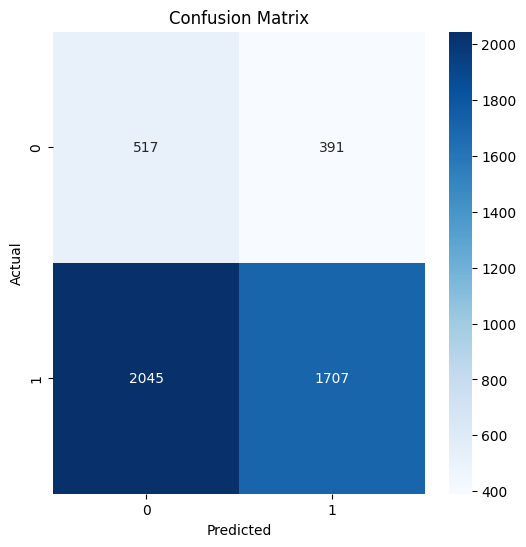

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_val, (y_val_pred_prob > 0.5).astype(int))  # Use 0.5 threshold

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

# Function to create embedding layers with dynamic embedding size
def create_embedding_layer(input_dim, output_dim):
    return Embedding(input_dim=input_dim, output_dim=output_dim)

# Function to dynamically test different embedding dimensions
def dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns):
    # Initialize a dictionary to store LabelEncoders for each column
    label_encoders = {}
    
    # Encode multilabel columns (i.e., columns containing semicolons) using LabelEncoder
    for col in multilabel_columns:
        le = LabelEncoder()
        
        # Combine the train and test data to fit the encoder on both datasets
        all_data = pd.concat([train_data[col], test_data[col]], axis=0)
        le.fit(all_data)  # Fit on the combined data
        
        # Apply the encoder to both train and test data
        train_data[col] = le.transform(train_data[col])
        test_data[col] = le.transform(test_data[col])
        
        label_encoders[col] = le  # Store the encoder for potential inverse transformation

    # Define maximum number of categories for each multilabel column
    max_categories = {col: len(label_encoders[col].classes_) for col in multilabel_columns}
    best_embedding_dim = 5  # Default embedding dimension

    best_accuracy = 0
    embedding_dim_range = [4, 8, 16, 32, 64]  # Example values for embedding dimensions to search

    for embedding_dim in embedding_dim_range:
        print(f"Testing embedding dimension: {embedding_dim}")

        # Define the input for multilabel columns
        multilabel_inputs = []
        embedding_layers = []

        for col in multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            embedding_layer = create_embedding_layer(input_dim=max_categories[col], output_dim=embedding_dim)(input_layer)
            flattened_embedding = Flatten()(embedding_layer)
            multilabel_inputs.append(input_layer)
            embedding_layers.append(flattened_embedding)

        # Define the input for non-multilabel columns
        non_multilabel_inputs = []
        for col in non_multilabel_columns:
            input_layer = Input(shape=(1,), name=col)
            non_multilabel_inputs.append(input_layer)

        # Concatenate multilabel embeddings with non-multilabel features
        combined_features = Concatenate()(embedding_layers + non_multilabel_inputs)

        # Define the rest of the model
        x = Dense(128, activation='relu')(combined_features)
        x = Dropout(0.3)(x)
        x = Dense(64, activation='relu')(x)
        output = Dense(len(train_data['JobSat'].unique()), activation='softmax')(x)

        # Build and compile the model
        model = Model(inputs=multilabel_inputs + non_multilabel_inputs, outputs=output)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # Prepare data for training
        X_train = [train_data[col] for col in multilabel_columns] + [train_data[col] for col in non_multilabel_columns]
        X_test = [test_data[col] for col in multilabel_columns] + [test_data[col] for col in non_multilabel_columns]

        y_train = train_data['JobSat']
        y_test = test_data['JobSat']

        # Train the model
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_test, y_test),
            epochs=10,
            batch_size=32,
            verbose=0  # Set verbose to 0 for better performance during testing
        )

        # Evaluate the model and update best accuracy if needed
        val_accuracy = history.history['val_accuracy'][-1]
        print(f"Validation Accuracy for embedding dimension {embedding_dim}: {val_accuracy:.4f}")

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_embedding_dim = embedding_dim
            print(f"New best embedding dimension: {best_embedding_dim} with accuracy {best_accuracy:.4f}")
    
    return best_embedding_dim

# Apply dynamic embedding search to find the best embedding dimension
best_embedding_dim = dynamic_embedding_size(train_data, test_data, multilabel_columns, non_multilabel_columns)
print(f"The best embedding dimension is: {best_embedding_dim}")


Testing embedding dimension: 4


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['MainBranch', 'Age', 'RemoteWork', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuildvsBuy', 'Country', 'Currency', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength', 'SurveyEase', 'Dataset']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '

Validation Accuracy for embedding dimension 4: 0.2568
New best embedding dimension: 4 with accuracy 0.2568
Testing embedding dimension: 8


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['MainBranch', 'Age', 'RemoteWork', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuildvsBuy', 'Country', 'Currency', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength', 'SurveyEase', 'Dataset']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '

Validation Accuracy for embedding dimension 8: 0.2568
Testing embedding dimension: 16


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['MainBranch', 'Age', 'RemoteWork', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuildvsBuy', 'Country', 'Currency', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength', 'SurveyEase', 'Dataset']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '

Validation Accuracy for embedding dimension 16: 0.2657
New best embedding dimension: 16 with accuracy 0.2657
Testing embedding dimension: 32


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['MainBranch', 'Age', 'RemoteWork', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuildvsBuy', 'Country', 'Currency', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength', 'SurveyEase', 'Dataset']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '

Validation Accuracy for embedding dimension 32: 0.2616
Testing embedding dimension: 64


d:\ReDI\Data Circle\Stack\stackproj\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['MainBranch', 'Age', 'RemoteWork', 'Check', 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuildvsBuy', 'Country', 'Currency', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIThreat', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'SurveyLength', 'SurveyEase', 'Dataset']. Received: the structure of inputs=('*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', '

Validation Accuracy for embedding dimension 64: 0.2578
The best embedding dimension is: 16
